<a href="https://colab.research.google.com/github/kubaBalga/Diplomka/blob/master/DiplomDraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Necessary imports

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io
from skimage.color import label2rgb
from skimage.color.colorlabel import rgb2gray
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

Get 256 shades of gray (in RGB format), randomly ordered

Intensity is scaled into interval [0, 1)

In [10]:
def get_random_grayscale():
  random_colors = []
  for i in range(256):
    brightness = ((i * 7229) % 256) / 256
    random_colors.append((brightness, brightness, brightness))
  return random_colors

Show calculated layer as grayscale image, save both image and numeric map

In [11]:
def show_and_save(layer_image, layer_map, layer_index):
    # plot
    fig_0 = plt.figure("Layer " + str(layer_index))
    fig_0.add_subplot().imshow(layer_image)
    plt.axis("off")

    # save image
    pil_image = Image.fromarray(obj=layer_image, mode="L")
    pil_image.save("segmentation_" + str(layer_index) + ".png")

    # save numeric map
    numeric_map = layer_map.tobytes()
    with open("segmentation_" + str(layer_index) + ".bin", "wb") as binary_file:
        binary_file.write(numeric_map)

Create hierarchical SLIC segmentation of input image
- Input: Path to 8-bit grayscale image, with resolution 768*512
- Effect: Creation of 7 segmentation maps (segmentation_0.bin - segmentation_6.bin), with corresponding map images


In [12]:
def make_segmentation(source_image):
    # load the image and convert it to a floating point data type
    image = img_as_float(io.imread(source_image))

    # calculate initial segments
    segments_0 = slic(image, n_segments = 6, sigma = 5, compactness = 0.03, slic_zero=False).astype(np.uint32) # SLICO not good?
    image_gray = np.round(rgb2gray(label2rgb(segments_0, colors = get_random_grayscale())) * 256).astype(np.uint8)
    show_and_save(image_gray, segments_0, 0)

    # calculate 1-ary segments
    segments_1 = np.array([[0] * image.shape[1] for i in range(image.shape[0])], dtype=np.uint32)
    for segment_idx in range(0, 6):
      segment_mask = segments_0 == segment_idx
      if (np.count_nonzero(segment_mask) == 0):
        continue
      # higher level of noise - increase compactness
      temp = slic(image, n_segments = 4, sigma = 5, compactness = 0.3, mask = segment_mask, slic_zero=True).astype(np.uint32)
      for i in range(len(temp)):
        for j in range(len(temp[i])):
          # for each segmented subsegment, add offset for total numbering
          if temp[i][j] != 0:
            temp[i][j] += 4 * segment_idx - 1
      segments_1 += temp
    image_gray = np.round(rgb2gray(label2rgb(segments_1, colors = get_random_grayscale())) * 256).astype(np.uint8)
    show_and_save(image_gray, segments_1, 1)

    # calculate 2-ary segments
    segments_2 = np.array([[0] * image.shape[1] for i in range(image.shape[0])], dtype=np.uint32)
    for segment_idx in range(0, 24):
      segment_mask = segments_1 == segment_idx
      if (np.count_nonzero(segment_mask) == 0):
        continue
      # higher level of noise - increase compactness
      temp = slic(image, n_segments = 4, sigma = 5, compactness = 1, mask = segment_mask, slic_zero=True).astype(np.uint32)
      for i in range(len(temp)):
        for j in range(len(temp[i])):
          # for each segmented subsegment, add offset for total numbering
          if temp[i][j] != 0:
            temp[i][j] += 4 * segment_idx - 1
      segments_2 += temp
    image_gray = np.round(rgb2gray(label2rgb(segments_2, colors = get_random_grayscale())) * 256).astype(np.uint8)
    show_and_save(image_gray, segments_2, 2)

    # calculate 3-ary segments
    segments_3 = np.array([[0] * image.shape[1] for i in range(image.shape[0])], dtype=np.uint32)
    for segment_idx in range(0, 96):
      segment_mask = segments_2 == segment_idx
      if (np.count_nonzero(segment_mask) == 0):
        continue
      # higher level of noise - increase compactness
      temp = slic(image, n_segments = 4, sigma = 5, compactness = 1, mask = segment_mask, slic_zero=True).astype(np.uint32)
      for i in range(len(temp)):
        for j in range(len(temp[i])):
          # for each segmented subsegment, add offset for total numbering
          if temp[i][j] != 0:
            temp[i][j] += 4 * segment_idx - 1
      segments_3 += temp
    image_gray = np.round(rgb2gray(label2rgb(segments_3, colors = get_random_grayscale())) * 256).astype(np.uint8)
    show_and_save(image_gray, segments_3, 3)

    # calculate 4-ary segments
    segments_4 = np.array([[0] * image.shape[1] for i in range(image.shape[0])], dtype=np.uint32)
    for segment_idx in range(0, 384):
      segment_mask = segments_3 == segment_idx
      if (np.count_nonzero(segment_mask) == 0):
        continue
      # higher level of noise - increase compactness
      temp = slic(image, n_segments = 4, sigma = 5, compactness = 1, mask = segment_mask, slic_zero=True).astype(np.uint32)
      for i in range(len(temp)):
        for j in range(len(temp[i])):
          # for each segmented subsegment, add offset for total numbering
          if temp[i][j] != 0:
            temp[i][j] += 4 * segment_idx - 1
      segments_4 += temp
    image_gray = np.round(rgb2gray(label2rgb(segments_4, colors = get_random_grayscale())) * 256).astype(np.uint8)
    show_and_save(image_gray, segments_4, 4)

    # calculate 5-ary segments
    segments_5 = np.array([[0] * image.shape[1] for i in range(image.shape[0])], dtype=np.uint32)
    for segment_idx in range(0, 1536):
      segment_mask = segments_4 == segment_idx
      if (np.count_nonzero(segment_mask) == 0):
        continue
      # higher level of noise - increase compactness
      temp = slic(image, n_segments = 4, sigma = 5, compactness = 1, mask = segment_mask, slic_zero=False).astype(np.uint32)
      for i in range(len(temp)):
        for j in range(len(temp[i])):
          # for each segmented subsegment, add offset for total numbering
          if temp[i][j] != 0:
            temp[i][j] += 4 * segment_idx - 1
      segments_5 += temp
    image_gray = np.round(rgb2gray(label2rgb(segments_5, colors = get_random_grayscale())) * 256).astype(np.uint8)
    show_and_save(image_gray, segments_5, 5)

    # calculate 6-ary segments
    segments_6 = np.array([[0] * image.shape[1] for i in range(image.shape[0])], dtype=np.uint32)
    for segment_idx in range(0, 6144):
      segment_mask = segments_5 == segment_idx
      if (np.count_nonzero(segment_mask) == 0):
        continue
      # higher level of noise - increase compactness
      temp = slic(image, n_segments = 4, sigma = 5, compactness = 1, mask = segment_mask, slic_zero=False).astype(np.uint32)
      for i in range(len(temp)):
        for j in range(len(temp[i])):
          # for each segmented subsegment, add offset for total numbering
          if temp[i][j] != 0:
            temp[i][j] += 4 * segment_idx - 1
      segments_6 += temp
    image_gray = np.round(rgb2gray(label2rgb(segments_6, colors = get_random_grayscale())) * 256).astype(np.uint8)
    show_and_save(image_gray, segments_6, 6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the 

KeyboardInterrupt: ignored

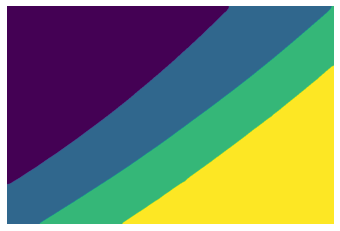

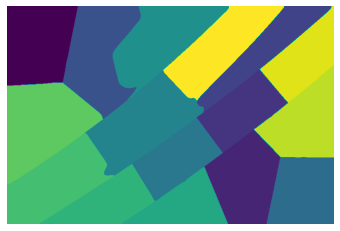

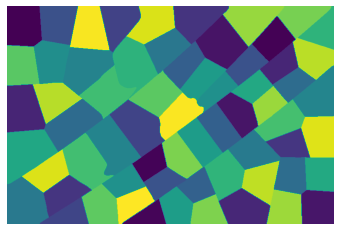

In [13]:
make_segmentation("image.png")